In [76]:
# Importing Libraries
import pandas as pd
import xgboost as xgb
import lightgbm as ltb
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import font_manager,rc
# font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
# rc('font',family=font_name)
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import lightgbm as ltb
plt.rc('font',family='Malgun Gothic')



In [2]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version


Pandas : 1.0.5
Numpy : 1.18.5
Scikit-Learn : 0.23.2
Python 3.8.3


In [3]:
매출높음=pd.read_csv("c:/data/project/team/revised/매출높음.csv",encoding='cp949',index_col=0) 
매출중간=pd.read_csv("c:/data/project/team/revised/매출중간.csv",encoding='cp949',index_col=0) 
매출낮음=pd.read_csv("c:/data/project/team/revised/매출낮음.csv",encoding='cp949',index_col=0) 


In [4]:
print(매출높음.shape)
print(매출중간.shape)
print(매출낮음.shape)

(63, 6)
(339, 6)
(602, 11)


In [5]:
X=매출높음.iloc[:,0:5] #독립변수
y=매출높음['생존률'] #종속변수
X1=매출중간.iloc[:,0:5]
y1=매출중간['생존률']
X2=매출낮음.iloc[:,0:10]
y2=매출낮음['생존률']

In [53]:
# 앙상블 부스팅모델
scores=[]
pipe = Pipeline([
     ('scaler', MinMaxScaler()),
     ('exp', GradientBoostingRegressor(random_state=0,n_estimators=500,subsample=1.0)),
])
params = {
 'exp__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='neg_root_mean_squared_error', cv=20)
ensemble=grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)
scores.append("GradientBoosting: "+str(grid.best_score_))

{'exp__max_depth': 4}
-0.11578326902870187


In [54]:
# KNN모델
from sklearn.neighbors import KNeighborsRegressor
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('exp',KNeighborsRegressor(n_neighbors=3)),
])
params={
    'exp__n_neighbors':list(range(1,5)),
}
grid=GridSearchCV(pipe,params,scoring='neg_root_mean_squared_error',cv=20)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)
scores.append("KNeighbors: "+str(grid.best_score_))

{'exp__n_neighbors': 3}
-0.11192282945165355


In [55]:
# 인공신경망모델
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',MLPRegressor(random_state=0, max_iter=1000)),
])
params={
    'clf__hidden_layer_sizes':[(50,),(100,),(100,100),(250,250)],
    'clf__activation':['tanh'],
    'clf__solver':['adam'],
    'clf__alpha':[0.001,0.01,0.1,0.5,0.7,1.0]
}
grid=GridSearchCV(pipe,params,scoring='neg_root_mean_squared_error',cv=10)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)
scores.append("MLP: "+str(grid.best_score_))

{'clf__activation': 'tanh', 'clf__alpha': 0.7, 'clf__hidden_layer_sizes': (100,), 'clf__solver': 'adam'}
-0.11777721441265916


In [56]:
# SVR모델
from sklearn.svm import SVR
pipe=Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf', SVR()),
])
params={
    'clf__C':[0.001,0.01,0.1,1,10,100,1000],
    'clf__gamma':[0.0001,0.001,0.01,0.1],
}
grid=GridSearchCV(pipe,params,scoring="neg_root_mean_squared_error",cv=20)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)
scores.append("SVR: "+str(grid.best_score_))

{'clf__C': 10, 'clf__gamma': 0.01}
-0.11042358151126885


In [67]:
# 랜덤포레스트 모델
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('exp', RandomForestRegressor(n_estimators=100))
])
params ={
     'exp__max_depth': list(range(2,8)),
     'exp__min_samples_split':[1,2,3,4],
     'exp__min_samples_leaf':[1]
     }
grid=GridSearchCV(pipe, params,scoring='neg_root_mean_squared_error',cv=20)
grid=grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)


{'exp__max_depth': 7, 'exp__min_samples_leaf': 1, 'exp__min_samples_split': 4}
-0.10937196634444772


In [68]:
scores.append("RandomForest: "+str(grid.best_score_))

In [69]:
scores

['GradientBoosting: -0.11578326902870187',
 'KNeighbors: -0.11192282945165355',
 'MLP: -0.11777721441265916',
 'SVR: -0.11042358151126885',
 'RandomForest: -0.11024062593290078',
 'RandomForest: -0.10937196634444772']

In [70]:
feature_importances = grid.best_estimator_._final_estimator.feature_importances_


<Figure size 720x432 with 0 Axes>

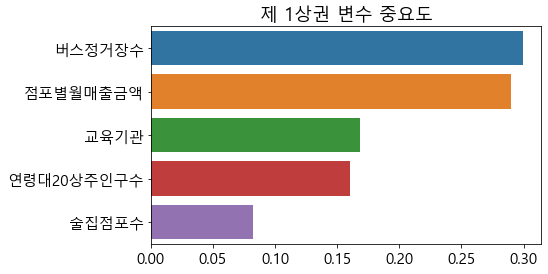

In [93]:
# 랜덤포레스트 변수중요도 

ft_importances=pd.Series(feature_importances,index=X.columns)
ft_importances=ft_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.figure(figsize=(7,4))
plt.title('제 1상권 변수 중요도')
sns.barplot(x=ft_importances,y=X.columns)
plt.show()

In [77]:
# 앙상블 부스팅모델
scores1=[]
pipe = Pipeline([
     ('scaler', MinMaxScaler()),
     ('exp', GradientBoostingRegressor(random_state=0,n_estimators=500,subsample=1.0)),
])
params = {
 'exp__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='neg_root_mean_squared_error', cv=20)
ensemble=grid.fit(X1, y1)
print(grid.best_params_)
print(grid.best_score_)
scores1.append("GradientBoosting: "+str(grid.best_score_))

{'exp__max_depth': 5}
-0.13524259007896272


In [78]:
# KNN모델
from sklearn.neighbors import KNeighborsRegressor
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('exp',KNeighborsRegressor(n_neighbors=3)),
])
params={
    'exp__n_neighbors':list(range(1,5)),
}
grid=GridSearchCV(pipe,params,scoring='neg_root_mean_squared_error',cv=20)
grid.fit(X1,y1)
print(grid.best_params_)
print(grid.best_score_)
scores1.append("KNeighbors: "+str(grid.best_score_))

{'exp__n_neighbors': 4}
-0.12777612177949754


In [79]:
# 인공신경망모델
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',MLPRegressor(random_state=0, max_iter=1000)),
])
params={
    'clf__hidden_layer_sizes':[(50,),(100,),(100,100),(150,150)],
    'clf__activation':['tanh'],
    'clf__solver':['adam'],
    'clf__alpha':[0.001,0.01,0.1,0.5,0.7,1.0]
}
grid=GridSearchCV(pipe,params,scoring='neg_root_mean_squared_error',cv=10)
grid.fit(X1,y1)
print(grid.best_params_)
print(grid.best_score_)
scores1.append("MLP: "+str(grid.best_score_))

{'clf__activation': 'tanh', 'clf__alpha': 0.5, 'clf__hidden_layer_sizes': (100, 100), 'clf__solver': 'adam'}
-0.11657672044468044


In [80]:
# SVR모델
from sklearn.svm import SVR
pipe=Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf', SVR()),
])
params={
    'clf__C':[0.001,0.01,0.1,1,10,100,1000],
    'clf__gamma':[0.0001,0.001,0.01,0.1],
}
grid=GridSearchCV(pipe,params,scoring="neg_root_mean_squared_error",cv=20)
grid.fit(X1,y1)
print(grid.best_params_)
print(grid.best_score_)
scores1.append("SVR: "+str(grid.best_score_))

{'clf__C': 0.1, 'clf__gamma': 0.1}
-0.11483342486605772


In [84]:
pipe = Pipeline([
     ('scaler', MinMaxScaler()),
     ('exp', ltb.LGBMRegressor(random_state=0,n_estimators=400,subsample=1.0)),
])
params = {
 'exp__max_depth': list(range(3,6)),
 'exp__num_leaves' : list(range(1,6))
}
grid = GridSearchCV(pipe, params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X1, y1)
print(grid.best_params_)
print(grid.best_score_)
scores1.append("lightgbm: " +str(grid.best_score_))

{'exp__max_depth': 3, 'exp__num_leaves': 2}
-0.12139896544593716


In [94]:
# 랜덤포레스트 모델
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('exp', RandomForestRegressor(n_estimators=100))
])
params ={
     'exp__max_depth': list(range(2,8)),
     'exp__min_samples_split':[1,2,3,4],
     'exp__min_samples_leaf':[1]
     }
grid=GridSearchCV(pipe, params,scoring='neg_root_mean_squared_error',cv=20)
grid=grid.fit(X1,y1)
print(grid.best_params_)
print(grid.best_score_)
scores1.append("RandomForest: " +str(grid.best_score_))

{'exp__max_depth': 2, 'exp__min_samples_leaf': 1, 'exp__min_samples_split': 4}
-0.11465785081037042


In [95]:
feature_importances = grid.best_estimator_._final_estimator.feature_importances_

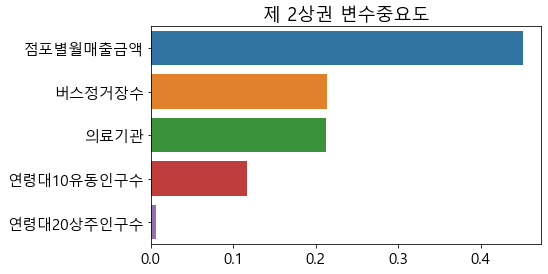

In [99]:
# 랜덤포레스트 변수중요도 
plt.rc('font', size=15)
ft_importances=pd.Series(feature_importances,index=X1.columns)
ft_importances=ft_importances.sort_values(ascending=False)
plt.figure(figsize=(7,4))
plt.title('제 2상권 변수중요도')
sns.barplot(x=ft_importances,y=X1.columns)
plt.show()

In [100]:
# 랜덤포레스트 모델
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('exp', RandomForestRegressor(n_estimators=100))
])
params ={
     'exp__max_depth': list(range(2,8)),
     'exp__min_samples_split':[1,2,3,4],
     'exp__min_samples_leaf':[1]
     }
grid=GridSearchCV(pipe, params,scoring='neg_root_mean_squared_error',cv=20)
grid=grid.fit(X2,y2)
print(grid.best_params_)
print(grid.best_score_)
scores1.append("RandomForest: " +str(grid.best_score_))

{'exp__max_depth': 7, 'exp__min_samples_leaf': 1, 'exp__min_samples_split': 3}
-0.12069113202991326


In [101]:
feature_importances = grid.best_estimator_._final_estimator.feature_importances_

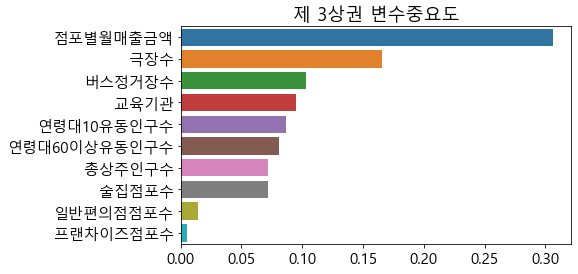

In [102]:
# 랜덤포레스트 변수중요도 
plt.rc('font', size=15)
ft_importances=pd.Series(feature_importances,index=X2.columns)
ft_importances=ft_importances.sort_values(ascending=False)
plt.figure(figsize=(7,4))
plt.title('제 3상권 변수중요도')
sns.barplot(x=ft_importances,y=X2.columns)
plt.show()